# PyCaret Classification Example


In [1]:
# check version
from pycaret.utils import version
version()

'2.3.10'

# 1. Data Repository

In [2]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [3]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Initialize Setup

In [4]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


2023/02/23 10:22:01 INFO mlflow.tracking.fluent: Experiment with name 'juice1' does not exist. Creating a new experiment.


# 3. Compare Baseline

In [5]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:22:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


# 4. Create Model

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.9460,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9018,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9160,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8133,0.9108,0.7241,0.7778,0.7500,0.6014,0.6023
4,0.8400,0.9325,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8933,0.9273,0.8276,0.8889,0.8571,0.7722,0.7735
6,0.7733,0.8081,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8133,0.8606,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.7838,0.8634,0.6786,0.7308,0.7037,0.5339,0.5348


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.8013,0.6897,0.8333,0.7547,0.6225,0.6292
1,0.7600,0.7729,0.7586,0.6667,0.7097,0.5066,0.5097
2,0.8133,0.8073,0.7931,0.7419,0.7667,0.6114,0.6123
3,0.7600,0.7406,0.6552,0.7037,0.6786,0.4875,0.4883
4,0.7733,0.7789,0.7586,0.6875,0.7213,0.5311,0.5329
5,0.7867,0.7815,0.7586,0.7097,0.7333,0.5559,0.5567
6,0.6400,0.6121,0.5172,0.5357,0.5263,0.2361,0.2362
7,0.6800,0.6459,0.5357,0.5769,0.5556,0.3061,0.3066
8,0.7432,0.7484,0.6429,0.6667,0.6545,0.4504,0.4505


In [9]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8788,0.7586,0.8000,0.7788,0.6452,0.6458
1,0.8267,0.8956,0.7069,0.8200,0.7593,0.6250,0.6292
2,0.8600,0.9267,0.8246,0.8103,0.8174,0.7039,0.7040
3,0.7114,0.7638,0.6842,0.6094,0.6446,0.4031,0.4050
4,0.7852,0.8598,0.7368,0.7119,0.7241,0.5484,0.5486
Mean,0.8033,0.8650,0.7422,0.7503,0.7448,0.5851,0.5865
Std,0.0518,0.0551,0.0484,0.0803,0.0585,0.1037,0.1035


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [12]:
ensembled_models = compare_models(include = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8088,0.8871,0.7212,0.7670,0.7431,0.5911,0.5921,0.1567
ada,Ada Boost Classifier,0.8061,0.8750,0.7177,0.7657,0.7403,0.5858,0.5872,0.1500
rf,Random Forest Classifier,0.7981,0.8711,0.7282,0.7419,0.7348,0.5719,0.5721,0.3767
lightgbm,Light Gradient Boosting Machine,0.7834,0.8667,0.6898,0.7311,0.7095,0.5371,0.5380,0.1033
et,Extra Trees Classifier,0.7794,0.8416,0.7072,0.7151,0.7108,0.5325,0.5329,0.2800


# 5. Tune Hyperparameters

In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9498,0.7586,0.9167,0.8302,0.7387,0.7466
1,0.8533,0.9055,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9175,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8133,0.9130,0.6897,0.8000,0.7407,0.5962,0.6002
4,0.8400,0.9258,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.9067,0.9258,0.8621,0.8929,0.8772,0.8020,0.8023
6,0.7733,0.8171,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8000,0.8606,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.8108,0.8641,0.7500,0.7500,0.7500,0.5978,0.5978


In [14]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.9228,0.7931,0.8214,0.8070,0.6888,0.6891
1,0.8400,0.9153,0.9310,0.7297,0.8182,0.6790,0.6951
2,0.8400,0.9224,0.8966,0.7429,0.8125,0.6751,0.6842
3,0.8533,0.8973,0.8966,0.7647,0.8254,0.7003,0.7069
4,0.8400,0.9355,0.8621,0.7576,0.8065,0.6711,0.6751
5,0.8667,0.9352,0.9310,0.7714,0.8438,0.7292,0.7391
6,0.7200,0.7781,0.7586,0.6111,0.6769,0.4349,0.4428
7,0.7600,0.8203,0.8571,0.6316,0.7273,0.5216,0.5411
8,0.8243,0.8859,0.8571,0.7273,0.7869,0.6392,0.6454


# 6. Ensemble Model

In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9014,0.6897,0.8696,0.7692,0.6493,0.6595
1,0.8133,0.8632,0.7586,0.7586,0.7586,0.6064,0.6064
2,0.8000,0.9078,0.6552,0.7917,0.7170,0.5645,0.5705
3,0.7733,0.8103,0.6207,0.7500,0.6792,0.5064,0.5118
4,0.7600,0.8891,0.7241,0.6774,0.7000,0.5004,0.5011
5,0.8400,0.9085,0.7931,0.7931,0.7931,0.6627,0.6627
6,0.6933,0.7455,0.5862,0.6071,0.5965,0.3493,0.3494
7,0.7067,0.7667,0.6429,0.6000,0.6207,0.3820,0.3826
8,0.7432,0.8599,0.6786,0.6552,0.6667,0.4580,0.4582


In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8208,0.6552,0.8261,0.7308,0.5908,0.6001
1,0.8267,0.8628,0.8276,0.7500,0.7869,0.6414,0.6436
2,0.8267,0.8516,0.8276,0.7500,0.7869,0.6414,0.6436
3,0.7867,0.8103,0.5862,0.8095,0.6800,0.5261,0.5415
4,0.8267,0.8703,0.7931,0.7667,0.7797,0.6369,0.6371
5,0.8267,0.9089,0.8276,0.7500,0.7869,0.6414,0.6436
6,0.7067,0.7110,0.6897,0.6061,0.6452,0.3969,0.3993
7,0.6933,0.6577,0.6786,0.5758,0.6230,0.3674,0.3710
8,0.7432,0.8040,0.8214,0.6216,0.7077,0.4865,0.5016


# 7. Blend Models

In [ ]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9100,0.7241,0.8400,0.7778,0.6538,0.6582
1,0.8400,0.9018,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8133,0.9190,0.8276,0.7273,0.7742,0.6162,0.6200
3,0.7467,0.8666,0.5862,0.7083,0.6415,0.4483,0.4531
4,0.8133,0.9213,0.7931,0.7419,0.7667,0.6114,0.6123
5,0.8400,0.9157,0.7931,0.7931,0.7931,0.6627,0.6627
6,0.7067,0.7759,0.6552,0.6129,0.6333,0.3893,0.3899
7,0.6933,0.7701,0.6429,0.5806,0.6102,0.3585,0.3598
8,0.7703,0.8641,0.7857,0.6667,0.7213,0.5281,0.5333


# 8. Stack Models

In [ ]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.9138,0.7241,0.8077,0.7636,0.6274,0.6298
1,0.8000,0.9059,0.7241,0.7500,0.7368,0.5756,0.5759
2,0.8667,0.9198,0.7931,0.8519,0.8214,0.7153,0.7164
3,0.7867,0.8924,0.7241,0.7241,0.7241,0.5502,0.5502
4,0.8267,0.9325,0.7586,0.7857,0.7719,0.6322,0.6325
5,0.8800,0.9250,0.9310,0.7941,0.8571,0.7548,0.7619
6,0.7467,0.7830,0.6552,0.6786,0.6667,0.4625,0.4627
7,0.8000,0.8157,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.7703,0.8703,0.6429,0.7200,0.6792,0.5012,0.5031


# 9. Analyze Model

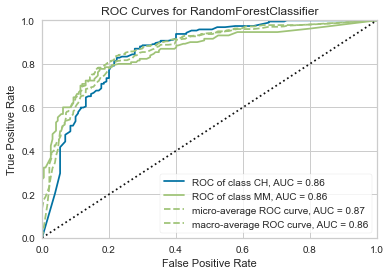

In [ ]:
plot_model(rf)

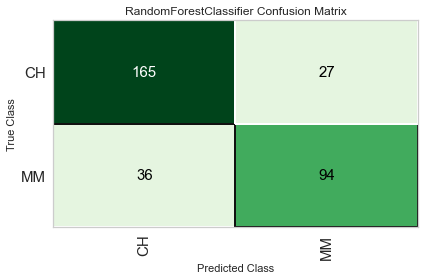

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

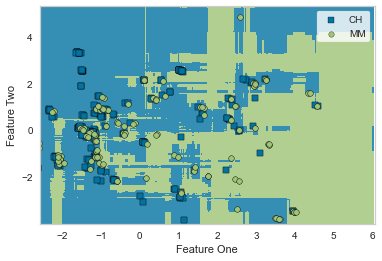

In [ ]:
plot_model(rf, plot = 'boundary')

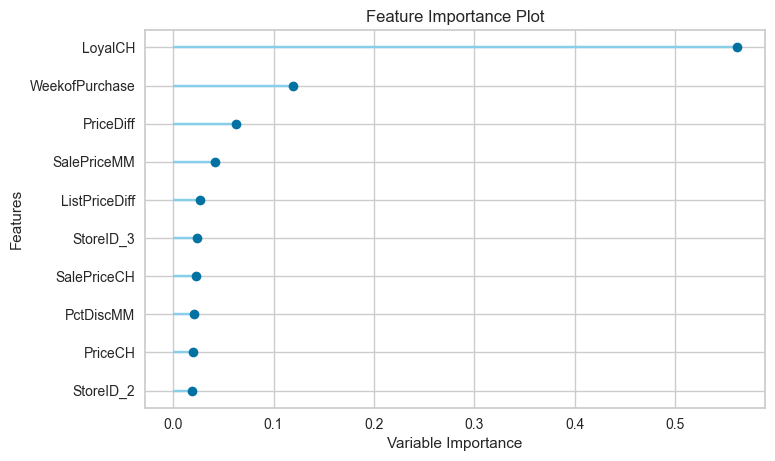

In [ ]:
plot_model(rf, plot = 'feature')

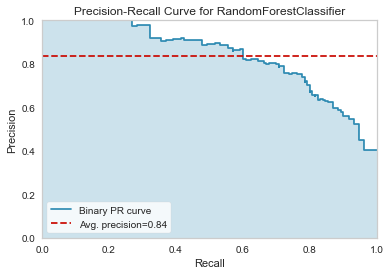

In [ ]:
plot_model(rf, plot = 'pr')

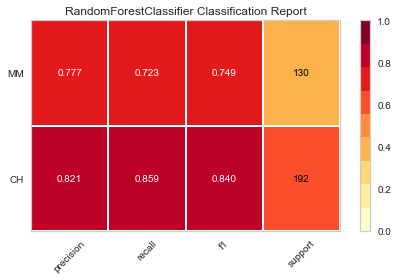

In [ ]:
plot_model(rf, plot = 'class_report')

In [ ]:
evaluate_model(rf)

# 10. Interpret Model

In [ ]:
lgbm = create_model('lightgbm', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7888,0.8754,0.7154,0.75,0.7323,0.5581,0.5585


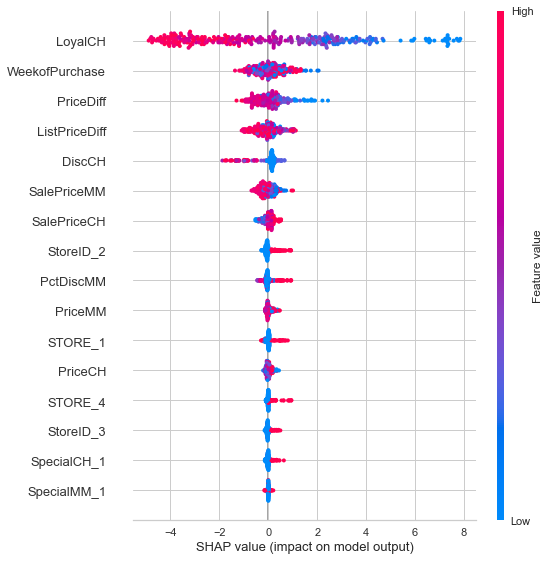

In [ ]:
interpret_model(lgbm)

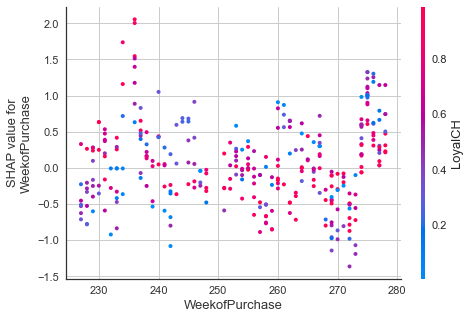

In [ ]:
interpret_model(lgbm, plot = 'correlation')

In [ ]:
interpret_model(lgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [16]:
best = automl(optimize = 'Recall')
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

# 12. Predict Model

In [ ]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8199,0.9066,0.7154,0.8158,0.7623,0.6183,0.6218


,WeekofPurchase,PriceCH,PriceMM,DiscCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,ListPriceDiff,StoreID_2,StoreID_3,SpecialCH_1,SpecialMM_1,STORE_1,STORE_4,Purchase,Label,Score
0,271.0,1.99,2.09,0.10,0.600000,1.69,1.89,-0.20,0.191388,0.10,0.0,1.0,1.0,0.0,0.0,0.0,MM,MM,0.5578
1,278.0,2.09,2.09,0.20,0.986489,2.09,1.89,0.20,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,CH,CH,0.9376
2,255.0,1.89,2.18,0.13,0.680000,2.18,1.76,0.42,0.000000,0.29,1.0,0.0,0.0,0.0,0.0,0.0,CH,CH,0.8536
3,258.0,1.76,2.18,0.00,0.320000,2.18,1.76,0.42,0.000000,0.42,0.0,0.0,0.0,0.0,1.0,0.0,CH,CH,0.5250
4,278.0,1.99,2.18,0.00,0.600000,2.18,1.99,0.19,0.000000,0.19,1.0,0.0,0.0,0.0,0.0,0.0,CH,CH,0.6487


In [ ]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,0.5518
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM,0.5470
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.7630
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.7279
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,0.6783


# 13. Save / Load Model

In [ ]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
                                         max_featur

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=4,
             

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org